#                                           Importing libraries


In [4]:
# Data analysis and wrangling 
import pandas as pd
from geopy import Point, distance
from math import *
import numpy as np
# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# EDA 'Data Understanding'

In [5]:
DF = pd.read_csv(r'E:\Work\Fixed Solutions\#2 Project\uber.csv')

In [6]:
DF.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
DF.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,2.771250e+07,1.601382e+07,1.000000,1.382535e+07,2.774550e+07,4.155530e+07,5.542357e+07
fare_amount,200000.0,1.135996e+01,9.901776e+00,-52.000000,6.000000e+00,8.500000e+00,1.250000e+01,4.990000e+02
pickup_longitude,200000.0,-7.252764e+01,1.143779e+01,-1340.648410,-7.399206e+01,-7.398182e+01,-7.396715e+01,5.741846e+01
pickup_latitude,200000.0,3.993589e+01,7.720539e+00,-74.015515,4.073480e+01,4.075259e+01,4.076716e+01,1.644421e+03
dropoff_longitude,199999.0,-7.252529e+01,1.311741e+01,-3356.666300,-7.399141e+01,-7.398009e+01,-7.396366e+01,1.153573e+03
dropoff_latitude,199999.0,3.992389e+01,6.794829e+00,-881.985513,4.073382e+01,4.075304e+01,4.076800e+01,8.726976e+02
passenger_count,200000.0,1.684535e+00,1.385997e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02


- We got 9 features (2 objects 2 int and 5 float) consisting of 200,000 observations.
- (key) column is not useful therefore it can be dropped.
- (unnamed: 0) column can be renamed and used as Trip_ID for further analysis.
- We got 1 missing value in both (lang, lat) columns which resemble 0.0005 of the DF.
- Datetime column data type is 'object' which needs to be modified.
- Possibility of outliear and false info in (fare, passenger_count) columns.
- New features to consider (Distance, Year, Month, Week, Day, Pickup_hr)

# Data Cleansing & Preparation

In [10]:
DF.rename(columns = {'Unnamed: 0':'Trip_ID'}, inplace = True)

In [11]:
DF.isnull().sum()

Trip_ID              0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
DF.dropna(inplace=True)
DF.drop(['key'], axis=1, inplace=True)

# Dropping unwanted Data

In [13]:
DF.pickup_datetime = pd.to_datetime(DF.pickup_datetime, errors = 'coerce')

# Converting to the right datetime data type

In [14]:
DF.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_ID,199999.0,2.771248e+07,1.601386e+07,1.000000,1.382534e+07,2.774524e+07,4.155535e+07,5.542357e+07
fare_amount,199999.0,1.135989e+01,9.901760e+00,-52.000000,6.000000e+00,8.500000e+00,1.250000e+01,4.990000e+02
pickup_longitude,199999.0,-7.252763e+01,1.143782e+01,-1340.648410,-7.399206e+01,-7.398182e+01,-7.396715e+01,5.741846e+01
pickup_latitude,199999.0,3.993588e+01,7.720558e+00,-74.015515,4.073480e+01,4.075259e+01,4.076716e+01,1.644421e+03
dropoff_longitude,199999.0,-7.252529e+01,1.311741e+01,-3356.666300,-7.399141e+01,-7.398009e+01,-7.396366e+01,1.153573e+03
dropoff_latitude,199999.0,3.992389e+01,6.794829e+00,-881.985513,4.073382e+01,4.075304e+01,4.076800e+01,8.726976e+02
passenger_count,199999.0,1.684543e+00,1.385995e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02


In [15]:
DF.info()

# Checking Modified DF

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Trip_ID            199999 non-null  int64              
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 13.7 MB


# Haversine Formula to Calculate Distance


In [16]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    Distance = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        Distance.append(c)
       
    return Distance

DF['Distance_km'] = distance_transform(DF['pickup_longitude'].to_numpy(),
                                                DF['pickup_latitude'].to_numpy(),
                                                DF['dropoff_longitude'].to_numpy(),
                                                DF['dropoff_latitude'].to_numpy()
                                              )

# haversine distance formula: d = 2R × sin⁻¹(√[sin²((θ₂ - θ₁)/2) + cosθ₁ × cosθ₂ × sin²((φ₂ - φ₁)/2)]).

In [17]:
DF= DF.assign(Pickup_hr = DF.pickup_datetime.dt.hour,
             Day= DF.pickup_datetime.dt.day,
             Month = DF.pickup_datetime.dt.month,
             Year = DF.pickup_datetime.dt.year,
             Day_of_week = DF.pickup_datetime.dt.dayofweek)
DF['day_name'] = pd.to_datetime(DF['pickup_datetime']).dt.day_name()   # Different way to assigen new column

# Extracting new columns from datetime columns to help us in further analysis

In [18]:
DF.head()

,Trip_ID,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_km,Pickup_hr,Day,Month,Year,Day_of_week,day_name
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,7,5,2015,3,Thursday
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,17,7,2009,4,Friday
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,24,8,2009,0,Monday
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,26,6,2009,4,Friday
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,28,8,2014,3,Thursday


# Outliers Detection and Treatmeant

In [19]:
def find_outliers_IQR(DF):

   q1=DF.quantile(0.25)

   q3=DF.quantile(0.75)

   IQR=q3-q1

   outliers = DF[((DF<(q1-1.5*IQR)) | (DF>(q3+1.5*IQR)))]

   return outliers

In [20]:
outliers = find_outliers_IQR(DF['fare_amount'])

print('number of outliers:' + str(len(outliers)))

print('max outlier value:' + str(outliers.max()))

print('min outlier value:' + str(outliers.min()))

outliers

number of outliers:17166
max outlier value:499.0
min outlier value:-52.0


6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17166, dtype: float64

In [21]:
outliers = find_outliers_IQR(DF['passenger_count'])

print('number of outliers:' + str(len(outliers)))

print('max outlier value:' + str(outliers.max()))

print('min outlier value:' + str(outliers.min()))

outliers

number of outliers:22557
max outlier value:208
min outlier value:4


4         5
6         5
12        5
24        5
29        5
         ..
199958    5
199959    5
199962    4
199969    5
199985    5
Name: passenger_count, Length: 22557, dtype: int64

Although this method is useful in many cases to detect outliers but in this case it's not the optimal choice since it indicates 4 as an outlier for passngers number which clearly is a valid number that needs to be kept, so we got to use our intution and internet to determine outliers in a better way.

Text(0, 0.5, 'fare_amount')

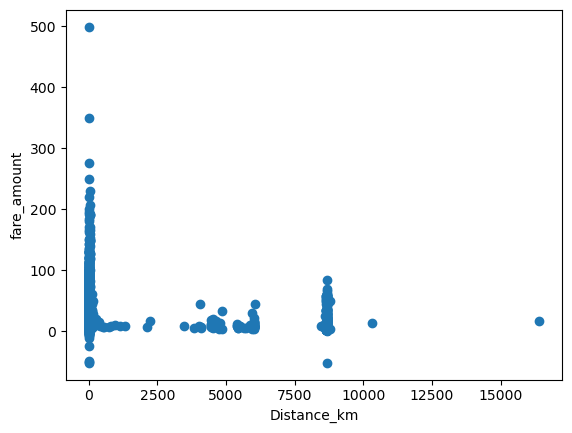

In [19]:
plt.scatter(DF['Distance_km'], DF['fare_amount'])
plt.xlabel("Distance_km")
plt.ylabel("fare_amount")


Text(0, 0.5, 'passenger_count')

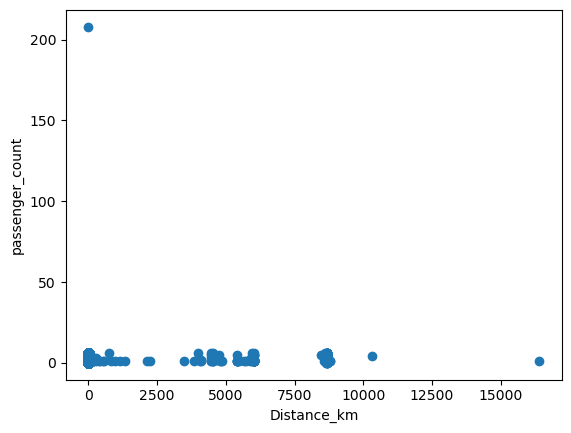

In [20]:
plt.scatter(DF['Distance_km'], DF['passenger_count'])
plt.xlabel("Distance_km")
plt.ylabel("passenger_count")

We can see outliers in all 3 features (Passnger_count, fare_amount, Distance_km)
- Uber max passnger count is 6
- Uber introduced uber eats and uber package within the data frame period therefore 0 passnger trips are allowed to stay
- Uber has no distance limitions but commen sense compels us to set distance to 60km max and trips with 0km is unvalid
- Fare can't be negative, and can't exceed 100usd, even generous tips wouldn't be inserted as trip price.

In [22]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Trip_ID            199999 non-null  int64              
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
 8   Distance_km        199999 non-null  float64            
 9   Pickup_hr          199999 non-null  int64              
 10  Day                199999 non-null  int64              
 11  Month              199999 non-null  int64              
 12  Year               199999 non-

In [23]:
DF.drop(DF[DF['Distance_km'] == 0].index, inplace = True)
DF.drop(DF[DF['Distance_km'] > 60].index, inplace = True)
DF.drop(DF[DF['fare_amount'] > 100].index, inplace = True)
DF.drop(DF[DF['fare_amount'] < 0].index, inplace = True)

DF.drop(DF[DF['passenger_count'] > 6].index, inplace = True)


DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193786 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Trip_ID            193786 non-null  int64              
 1   fare_amount        193786 non-null  float64            
 2   pickup_datetime    193786 non-null  datetime64[ns, UTC]
 3   pickup_longitude   193786 non-null  float64            
 4   pickup_latitude    193786 non-null  float64            
 5   dropoff_longitude  193786 non-null  float64            
 6   dropoff_latitude   193786 non-null  float64            
 7   passenger_count    193786 non-null  int64              
 8   Distance_km        193786 non-null  float64            
 9   Pickup_hr          193786 non-null  int64              
 10  Day                193786 non-null  int64              
 11  Month              193786 non-null  int64              
 12  Year               193786 non-

<Figure size 1000x600 with 0 Axes>

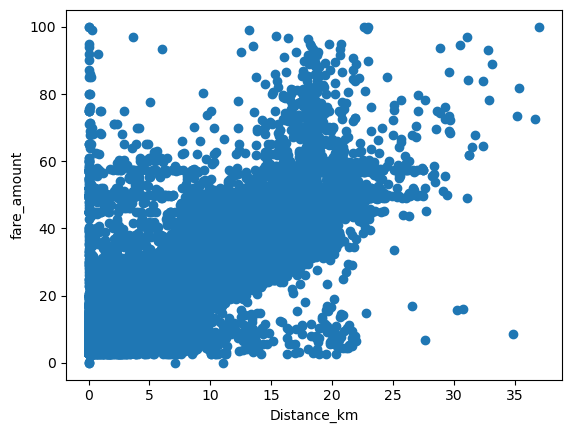

<Figure size 1000x600 with 0 Axes>

In [23]:
plt.scatter(DF['Distance_km'], DF['fare_amount'])
plt.xlabel("Distance_km")
plt.ylabel("fare_amount")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

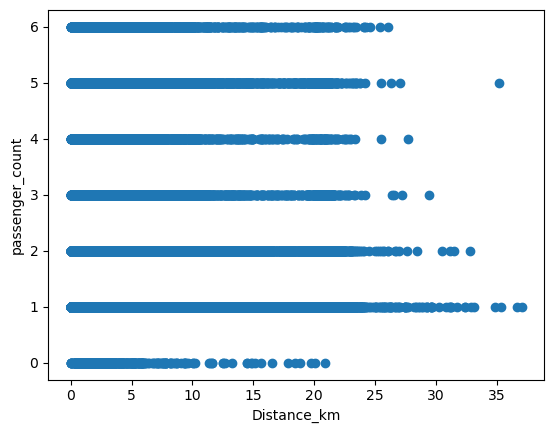

<Figure size 1000x600 with 0 Axes>

In [24]:
plt.scatter(DF['Distance_km'], DF['passenger_count'])
plt.xlabel("Distance_km")
plt.ylabel("passenger_count")
plt.figure(figsize=(10, 6))


                          Now the scatter plot looks more disgustable 


# Descriptive Analysis & Visualization

In [24]:
DF['Count'] = 1

Average trips a year: 
[2009, 2010, 2011, 2012, 2013, 2014, 2015] [29757, 29157, 30756, 31180, 30387, 29093, 13456]


<BarContainer object of 7 artists>

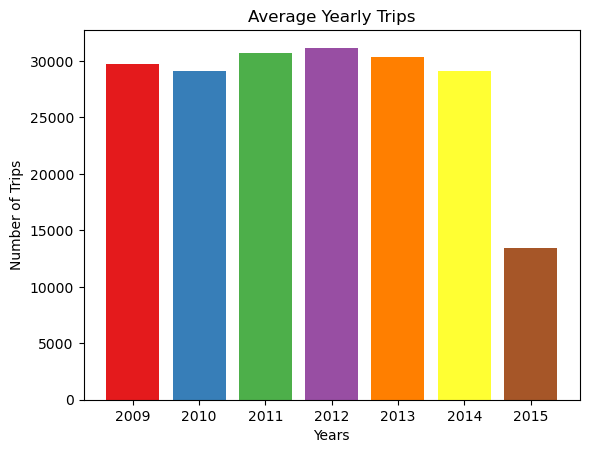

In [26]:
no_of_trips = []
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

colors = sns.color_palette('Set1')

for i in range(2009, 2016):
    x = DF.loc[DF['Year'] == i, 'Count'].sum()
    no_of_trips.append(x)

print("Average trips a year: ")
print(year, no_of_trips)


plt.title("Average Yearly Trips")
plt.xlabel("Years")
plt.ylabel("Number of Trips")

plt.bar(year, no_of_trips, color=colors)

Average trips a Month: 
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] [17153, 16160, 18194, 18036, 18280, 17230, 14602, 13691, 14802, 15720, 14848, 15070]


<BarContainer object of 12 artists>

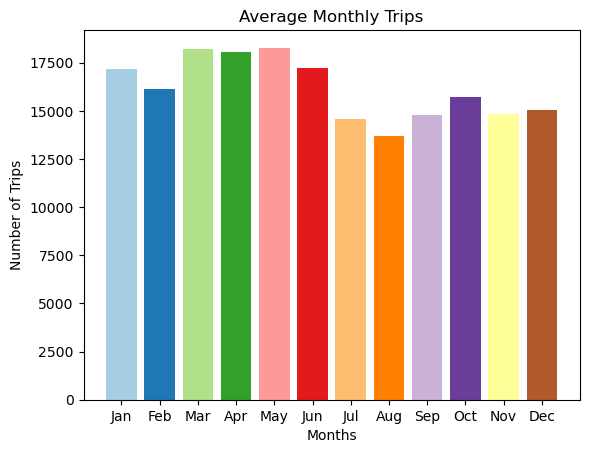

In [27]:
no_of_trips = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = sns.color_palette('Paired')

for i in range(1, 13):
    x = DF.loc[DF['Month'] == i, 'Count'].sum()
    no_of_trips.append(x)

print("Average trips a Month: ")
print(month, no_of_trips)


plt.title("Average Monthly Trips")
plt.xlabel("Months")
plt.ylabel("Number of Trips")

plt.bar(month, no_of_trips, color=colors)

Average trips by Days: 
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] [24422, 27284, 28115, 29100, 29908, 29353, 25604]


<BarContainer object of 7 artists>

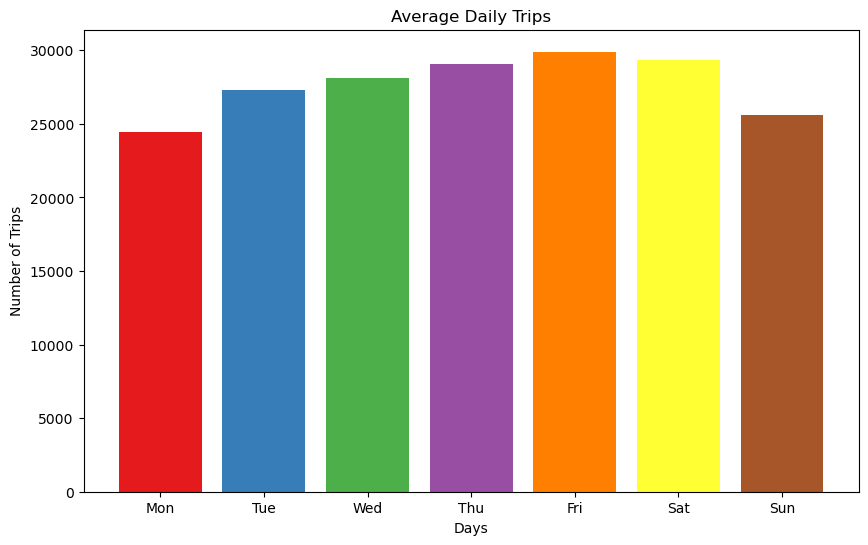

In [28]:
no_of_trips = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = sns.color_palette('Set1')

for i in range(0, 7):
    x = DF.loc[DF['Day_of_week'] == i, 'Count'].sum()
    no_of_trips.append(x)

print("Average trips by Days: ")
print(day, no_of_trips)

plt.figure(figsize=(10, 6))
plt.title("Average Daily Trips")
plt.xlabel("Days")
plt.ylabel("Number of Trips")

plt.bar(day, no_of_trips, color=colors)

In [29]:
DF_1 = DF[['Distance_km', 'Day_of_week', 'Pickup_hr']].copy()

DF_H = DF_1.copy()

DF_H = DF_H.groupby(['Pickup_hr', 'Day_of_week']).mean()
DF_H = DF_H.unstack(level=0)


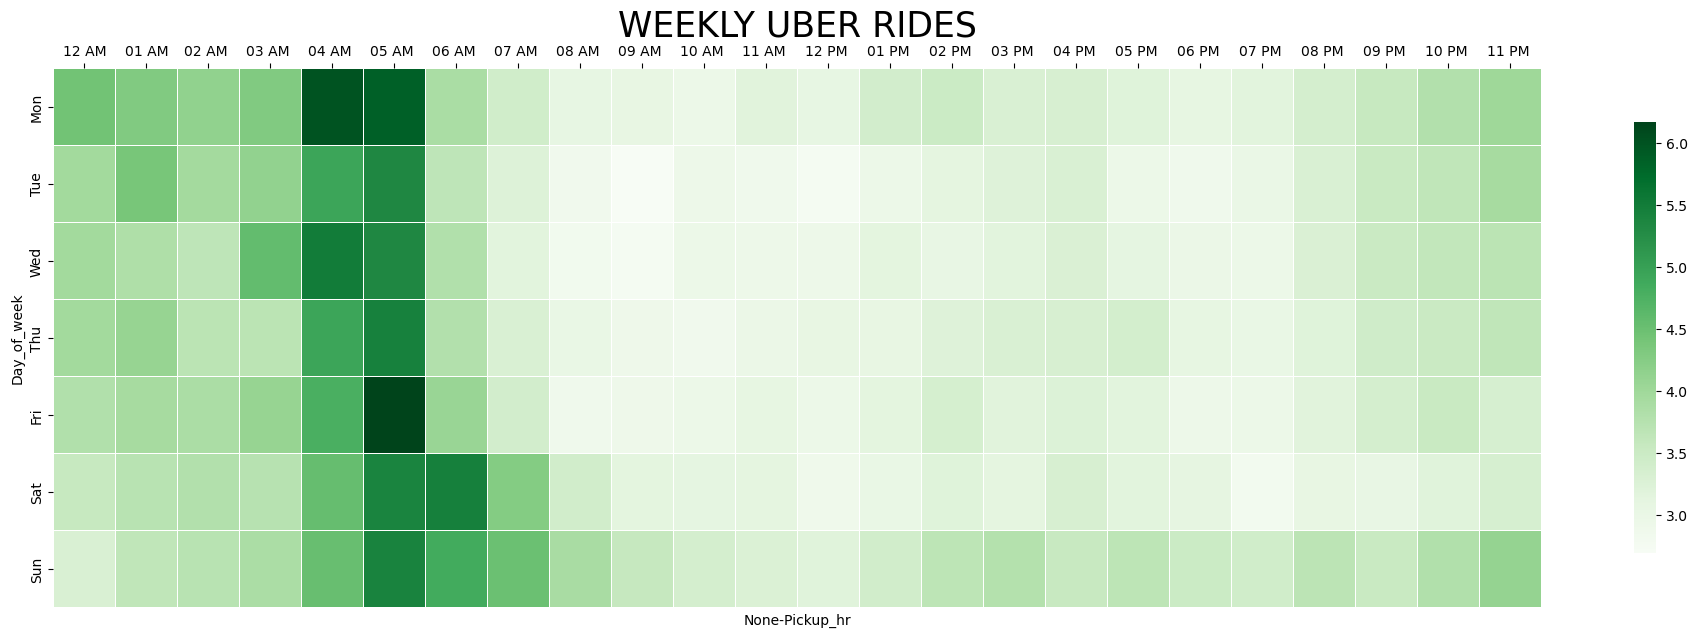

In [30]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.heatmap(DF_H, cmap="Greens",
           linewidth=.3, cbar_kws={"shrink": .8})

xticks_labels = ['12 AM', '01 AM', '02 AM ', '03 AM ', '04 AM ', '05 AM ', '06 AM ', '07 AM ', 
                 '08 AM ', '09 AM ', '10 AM ', '11 AM ', '12 PM ', '01 PM ', '02 PM ', '03 PM ',
                 '04 PM ', '05 PM ', '06 PM ', '07 PM ', '08 PM ', '09 PM ', '10 PM ', '11 PM ']

yticks_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(np.arange(24) + .5, labels=xticks_labels)
plt.yticks(np.arange(7) + .5, labels=yticks_labels)

ax.xaxis.tick_top()

title = 'Weekly Uber Rides'.upper()
plt.title(title, fontdict={'fontsize': 25})

plt.show()

In [30]:
corr = DF.corr()

corr.style.background_gradient(cmap='BuPu')

,Trip_ID,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance_km,Pickup_hr,Day,Month,Year,Day_of_week,Count
Trip_ID,1.000000,-0.000040,-0.000421,-0.000830,-0.000370,0.000215,0.002583,-0.000701,0.000160,0.000480,0.001952,-0.001095,-0.004786,nan
fare_amount,-0.000040,1.000000,0.012186,-0.008814,0.010735,-0.008965,0.014658,0.887071,-0.020679,0.000727,0.024816,0.122906,0.005181,nan
pickup_longitude,-0.000421,0.012186,1.000000,-0.949098,0.999885,-0.993975,0.009756,0.005374,0.001839,0.019515,-0.007490,0.013472,0.008235,nan
pickup_latitude,-0.000830,-0.008814,-0.949098,1.000000,-0.949095,0.954760,-0.009814,0.003213,-0.001821,-0.019372,0.007595,-0.013687,-0.008918,nan
dropoff_longitude,-0.000370,0.010735,0.999885,-0.949095,1.000000,-0.993963,0.009744,0.004482,0.000942,0.019539,-0.007445,0.013365,0.008536,nan
dropoff_latitude,0.000215,-0.008965,-0.993975,0.954760,-0.993963,1.000000,-0.009862,-0.002283,-0.001018,-0.020097,0.007974,-0.014359,-0.008910,nan
passenger_count,0.002583,0.014658,0.009756,-0.009814,0.009744,-0.009862,1.000000,0.009432,0.014930,0.002682,0.009230,0.006243,0.036802,nan
Distance_km,-0.000701,0.887071,0.005374,0.003213,0.004482,-0.002283,0.009432,1.000000,-0.032523,0.000556,0.012334,0.025868,0.017390,nan
Pickup_hr,0.000160,-0.020679,0.001839,-0.001821,0.000942,-0.001018,0.014930,-0.032523,1.000000,0.005305,-0.004157,0.001856,-0.086309,nan
Day,0.000480,0.000727,0.019515,-0.019372,0.019539,-0.020097,0.002682,0.000556,0.005305,1.000000,-0.017130,-0.012180,0.005023,nan


- Strong corr between pick up and dropoff lats and same for longs cause the are close to each other in value and position
- Strong inverse corr is also showen between lat and lon this time because lang and lat are bulit on different directions 
- what's most important here is the high postive corr between fare and distance which will be our measure for our linear regression ML model

# Machine Learning Models


In [32]:
X = DF['Distance_km'].values.reshape(-1, 1)      
y = DF['fare_amount'].values.reshape(-1, 1)    

#Assigning our features 

In [33]:
std = StandardScaler()
y_std = std.fit_transform(y)

x_std = std.fit_transform(X)

#Standardizing our data for better ML performance 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

#Splitting out data to train and test using sklearn

In [35]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

#Our simple regression model

Training set score: 0.79
Test set score: 0.7866032


In [36]:
y_pred = l_reg.predict(X_test)
df = {'Actual': y_test, 'Predicted': y_pred}


In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 0.2465529458176031


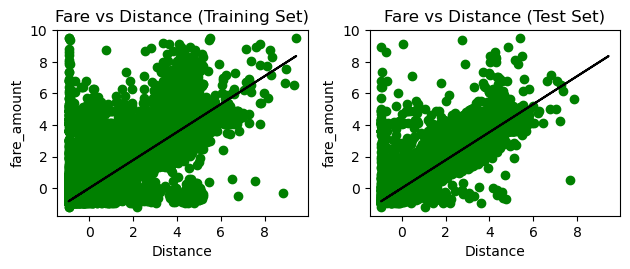

In [38]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, l_reg.predict(X_train), color ="black")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, l_reg.predict(X_train), color ="black")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")


plt.tight_layout()
plt.rcParams["figure.figsize"] = (32,22)
plt.show()


# Conclusion & Recommendations

- Main Ascpects to consider to estimate a trip fare are distance travelled and peek hours, so these data must be entered promptly
- 